# Part II - (Ford GoBike System Data Presentation)
## by Layan Almegbil

## Investigation Overview

This presentation focuses on understanding trip duration patterns in the San Francisco Bay Area’s bike-sharing system. Key findings reveal how trip length varies by user type, gender, and day of the week.




## Dataset Overview and Executive Summary


- 183K rides from February 2019

- Key fields: duration_sec, user_type, member_gender, start_time

- Main analysis: how trip duration relates to type, gender, and time


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Helper function to set plot titles and axis labels
def set_plot_labels(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

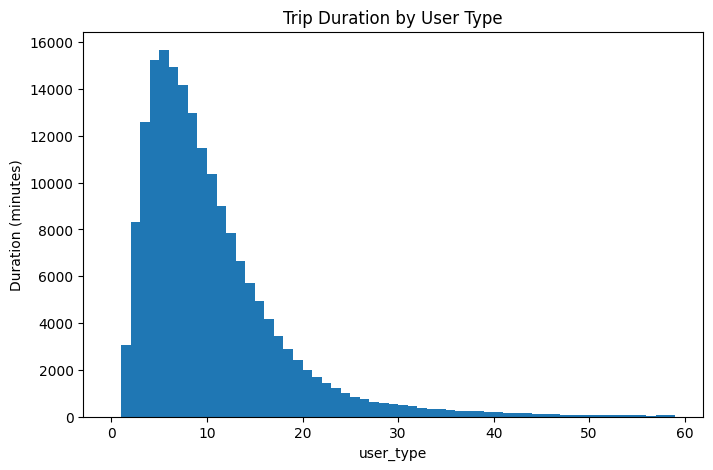

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])  # convert start_time from string to datetime
df['duration_min'] = df['duration_sec'] / 60  # create a new column for trip duration in minutes

# create histogram of trip durations (in minutes) up to 60 minutes
plt.figure(figsize=(8, 5))
bins = np.arange(0, 60, 1)  # set bin size to 1-minute intervals
plt.hist(df['duration_min'], bins=bins)
set_plot_labels('Trip Duration by User Type', 'user_type', 'Duration (minutes)')
plt.show()

> **Observation**: The trip durations are right-skewed, with most trips lasting between 5 to 15 minutes. A sharp drop is observed after 20 minutes, and very few trips last close to 60 minutes.

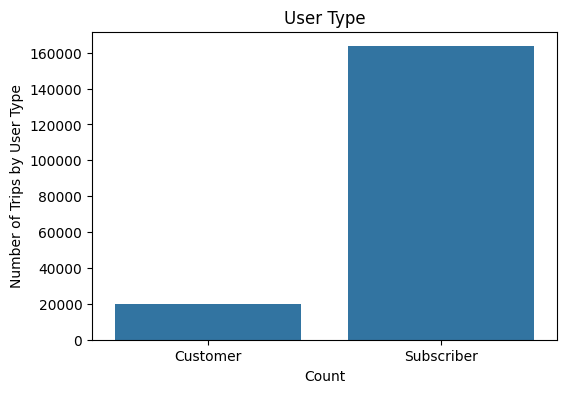

In [5]:
# count plot of user types
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='user_type')
set_plot_labels('User Type', 'Count', 'Number of Trips by User Type')
plt.show()

> **Observation**: The majority of trips are taken by subscribers, indicating that the system is used mainly by regular or commuting users.

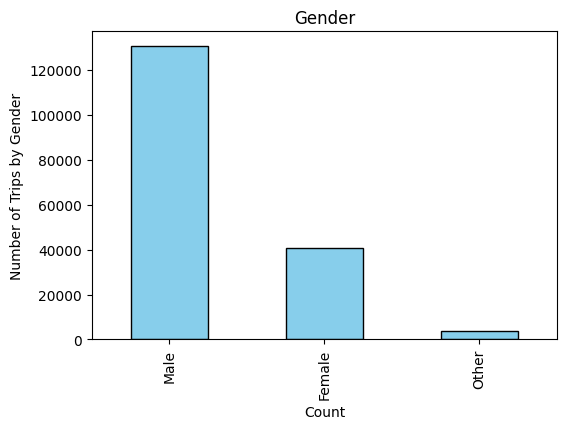

In [6]:
# Bar chart of member genders
plt.figure(figsize=(6, 4))
df['member_gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
set_plot_labels('Gender', 'Count', 'Number of Trips by Gender')
plt.show()

> **Observation**: Males dominate the user base, followed by females. The “Other” category is significantly underrepresented.

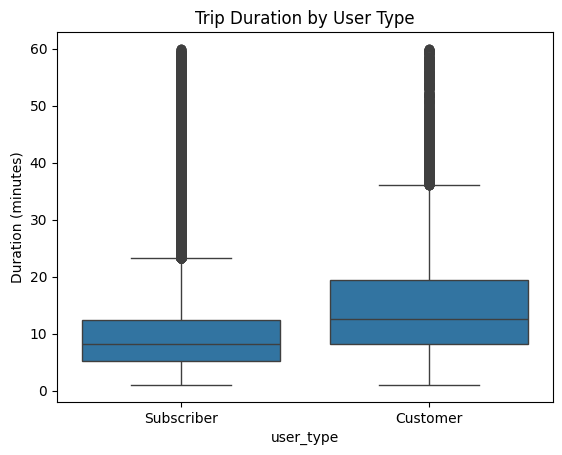

In [7]:
sns.boxplot(data=df[df['duration_min'] <= 60], x='user_type', y='duration_min')
set_plot_labels('Trip Duration by User Type', 'user_type', 'Duration (minutes)')
plt.show()

> **Observation**: Subscribers tend to have shorter and more consistent trip durations, while customers show a wider range with more outliers, suggesting more leisure or exploratory use.

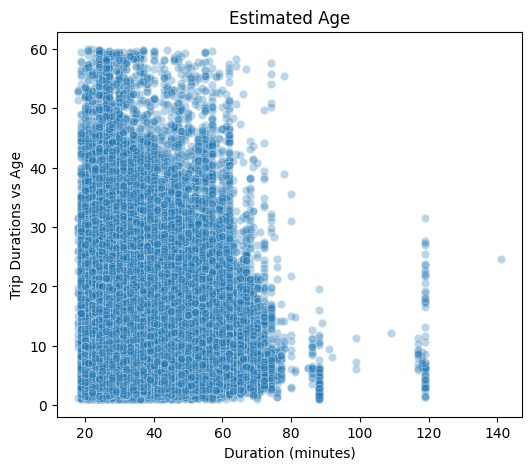

In [8]:
# scatterplot
df['age'] = 2019 - df['member_birth_year']
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df[df['duration_min'] <= 60], x='age', y='duration_min', alpha=0.3)
set_plot_labels('Estimated Age', 'Duration (minutes)', 'Trip Durations vs Age')
plt.show()

> **Observation**: Younger users show a wider spread in trip durations, while older users tend to have shorter trips.

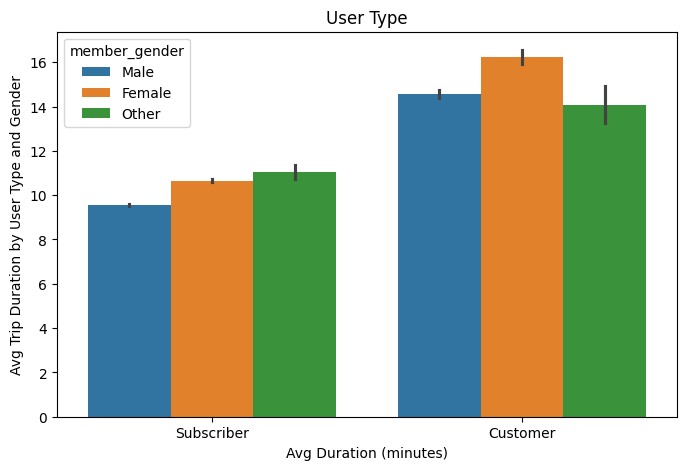

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df[df['duration_min'] <= 60], x='user_type', y='duration_min', hue='member_gender')
set_plot_labels('User Type', 'Avg Duration (minutes)', 'Avg Trip Duration by User Type and Gender')
plt.show()

> **Observation**: Customers of all genders take longer trips on average compared to subscribers. Female customers show the highest average trip duration.

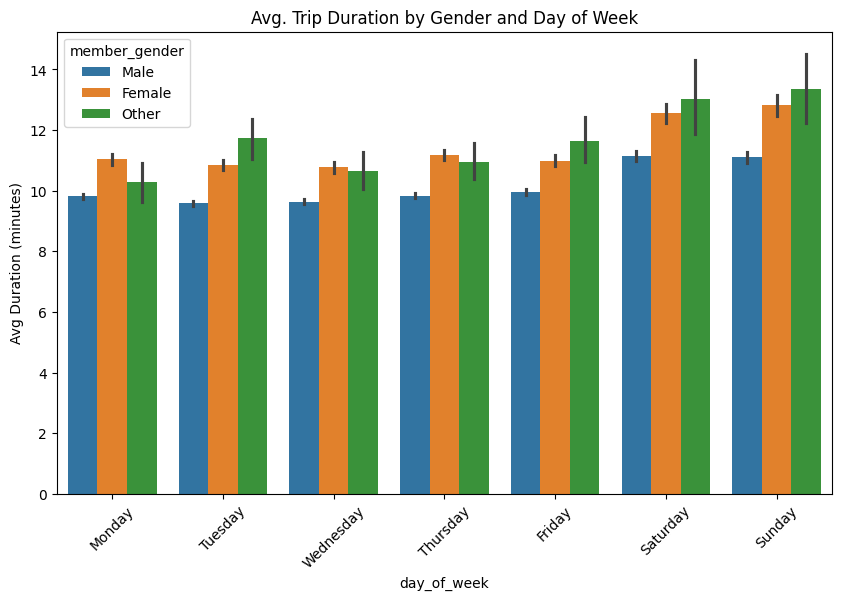

In [10]:
df['day_of_week'] = df['start_time'].dt.day_name()

plt.figure(figsize=(10,6))
sns.barplot(data=df[df['duration_min'] <= 60], x='day_of_week', y='duration_min', hue='member_gender', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

set_plot_labels('Avg. Trip Duration by Gender and Day of Week', 'day_of_week', 'Avg Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

> **Observation**: Across all genders, trip durations peak on weekends, particularly on Saturday and Sunday, suggesting more leisure or extended rides during those days.

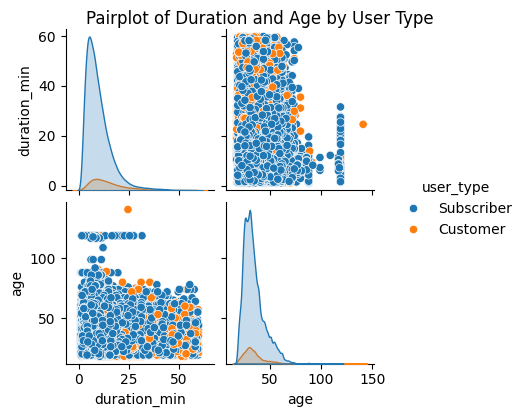

In [11]:
sns.pairplot(df[df['duration_min'] <= 60],
             vars=['duration_min','age'],
             hue='user_type', height=2)
plt.suptitle('Pairplot of Duration and Age by User Type', y=1.02)
plt.show()

> **Observation**: Customers show higher variance in both age and trip duration. Subscribers cluster around shorter durations and mid-age range.


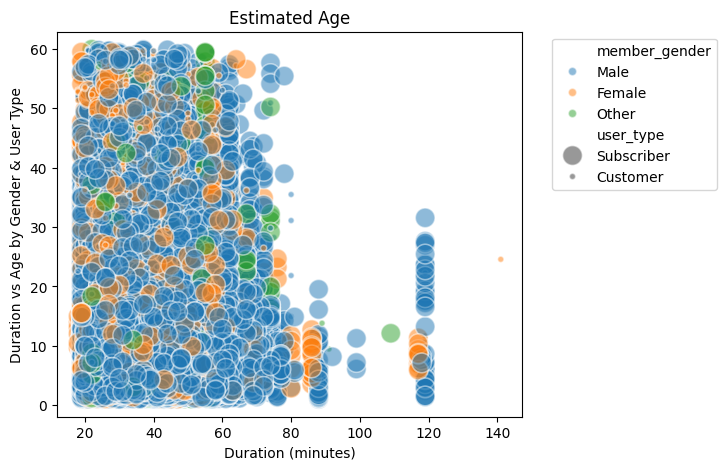

In [12]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df[df['duration_min'] <= 60],
                x='age', y='duration_min',
                hue='member_gender',
                size='user_type', sizes=(20, 200),
                alpha=0.5)
set_plot_labels('Estimated Age', 'Duration (minutes)', 'Duration vs Age by Gender & User Type')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.show()

> **Observation**: The "Other" gender group tends to have longer trip durations across ages. Subscriber trips dominate the data overall.